# 1- import packages and load data

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import plotly.express as px

In [3]:
df=pd.read_csv('mymoviedb.csv',engine='python')
df

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9832,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9833,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9834,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9835,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


In [4]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [5]:
# show some general properties for the data
#To know nan values and data type for features
df.info()
#Some features have missing values and we want to change the data type for release date,Vote_Count and Vote_Average

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9837 non-null   object 
 1   Title              9828 non-null   object 
 2   Overview           9828 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   object 
 5   Vote_Average       9827 non-null   object 
 6   Original_Language  9827 non-null   object 
 7   Genre              9826 non-null   object 
 8   Poster_Url         9826 non-null   object 
dtypes: float64(1), object(8)
memory usage: 691.8+ KB


In [6]:
df['Title'].value_counts()

Beauty and the Beast    4
Alice in Wonderland     4
Porno                   3
The Jungle Book         3
Black Christmas         3
                       ..
Attack on Titan         1
Next Gen                1
The Glimmer Man         1
The Call of Sex         1
Runaway Train           1
Name: Title, Length: 9514, dtype: int64

# 3-This summary about what I get form the above functions
> #### 1- We want to change data type for Release_Date from object to date_time , and Vote_Count,Vote_Average from object to int64 ,float64 recpectivily
> #### 2- dealing with NAN values
> #### 3- change data type for Original_Language and Genre to categorical
> #### 4-see why Title column has duplicates 

In [7]:
#change dt for 'Release_Date' to_datetime
df['Release_Date']=pd.to_datetime(df['Release_Date'], errors='coerce')
#assert that
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9837 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9828 non-null   object        
 2   Overview           9828 non-null   object        
 3   Popularity         9827 non-null   float64       
 4   Vote_Count         9827 non-null   object        
 5   Vote_Average       9827 non-null   object        
 6   Original_Language  9827 non-null   object        
 7   Genre              9826 non-null   object        
 8   Poster_Url         9826 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 691.8+ KB


In [8]:
#To show the columns that have nat values
df[df['Release_Date'].isna()]
#Release_Date have NAT values also anther columns have NAN values so will drop these rows

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
1106,NaT,None,None,NaN,None,None,None,None,None
1107,NaT,None,None,NaN,None,None,None,None,None
1108,NaT,None,None,NaN,None,None,None,None,None
1109,NaT,None,None,NaN,None,None,None,None,None
1110,NaT,None,None,NaN,None,None,None,None,None
1111,NaT,None,None,NaN,None,None,None,None,None
1112,NaT,None,None,NaN,None,None,None,None,None
1113,NaT,None,None,NaN,None,None,None,None,None
1114,NaT,None,None,NaN,None,None,None,None,None
1115,NaT,61.328,35,7.1,en,Animation,https://image.tmdb.org/t/p/original/6iXYe7AkQ1...,None,None


In [9]:
#drop rows that have NAT&NAN Values
df.drop(index=[1106,1107,1108,1109,1110,1111,1112,1113,1114,1115],axis=0,inplace=True)

In [10]:
#check again 
df.info()
#now Release_Date has no nan values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9827 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9827 non-null   datetime64[ns]
 1   Title              9827 non-null   object        
 2   Overview           9827 non-null   object        
 3   Popularity         9826 non-null   float64       
 4   Vote_Count         9826 non-null   object        
 5   Vote_Average       9826 non-null   object        
 6   Original_Language  9826 non-null   object        
 7   Genre              9826 non-null   object        
 8   Poster_Url         9826 non-null   object        
dtypes: datetime64[ns](1), float64(1), object(7)
memory usage: 767.7+ KB


In [11]:
df[df['Vote_Count'].isna()]
#only one row ,Not useful for data analysis so I will drop this row

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
1105,2013-10-20,Pixie Hollow Bake Off,Tink challenges Gelata to see who can bake the...,NaN,None,None,None,None,None


In [12]:
#drop this row 
df.drop(index=1105,axis=0,inplace=True)

In [13]:
#convert data type for 'Vote_Count' and Vote_Average
df['Vote_Count']=pd.to_numeric(df['Vote_Count'])
df['Vote_Average']=pd.to_numeric(df['Vote_Average'])

In [14]:
df['Genre']=df['Genre'].astype('category')

In [15]:
df['Original_Language']=df['Original_Language'].astype('category')

In [16]:
df['Genre'].value_counts()

Drama                                        466
Comedy                                       403
Drama, Romance                               248
Horror                                       238
Horror, Thriller                             199
                                            ... 
Comedy, Horror, Science Fiction, Thriller      1
Horror, Science Fiction, Action, Thriller      1
Comedy, Horror, War                            1
Horror, Science Fiction, Action, Fantasy       1
Crime, Thriller, Animation                     1
Name: Genre, Length: 2337, dtype: int64

In [17]:
#check again 
df.info()
#our data now not have any NAN values also, correct data type
#all the column are cleaing and ready for the next step `EDA`

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9826 entries, 0 to 9836
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Release_Date       9826 non-null   datetime64[ns]
 1   Title              9826 non-null   object        
 2   Overview           9826 non-null   object        
 3   Popularity         9826 non-null   float64       
 4   Vote_Count         9826 non-null   int64         
 5   Vote_Average       9826 non-null   float64       
 6   Original_Language  9826 non-null   category      
 7   Genre              9826 non-null   category      
 8   Poster_Url         9826 non-null   object        
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 742.8+ KB


In [18]:
#TO KNOW OUTLIERS
df.describe().round(2)
#we have outlier at Popularity,Vote_Count,Vote_Average and we will dealing with that when arrive to Machine learning model by z-score(standrization) or IQR

,Popularity,Vote_Count,Vote_Average
count,9826.00,9826.00,9826.00
mean,40.32,1392.94,6.44
std,108.88,2611.30,1.13
min,13.35,0.00,0.00
25%,16.13,146.00,5.90
50%,21.20,444.00,6.50
75%,35.18,1376.00,7.10
max,5083.95,31077.00,10.00


# Outlier detection & Handling

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001F55CA16370>,
      dtype=object)

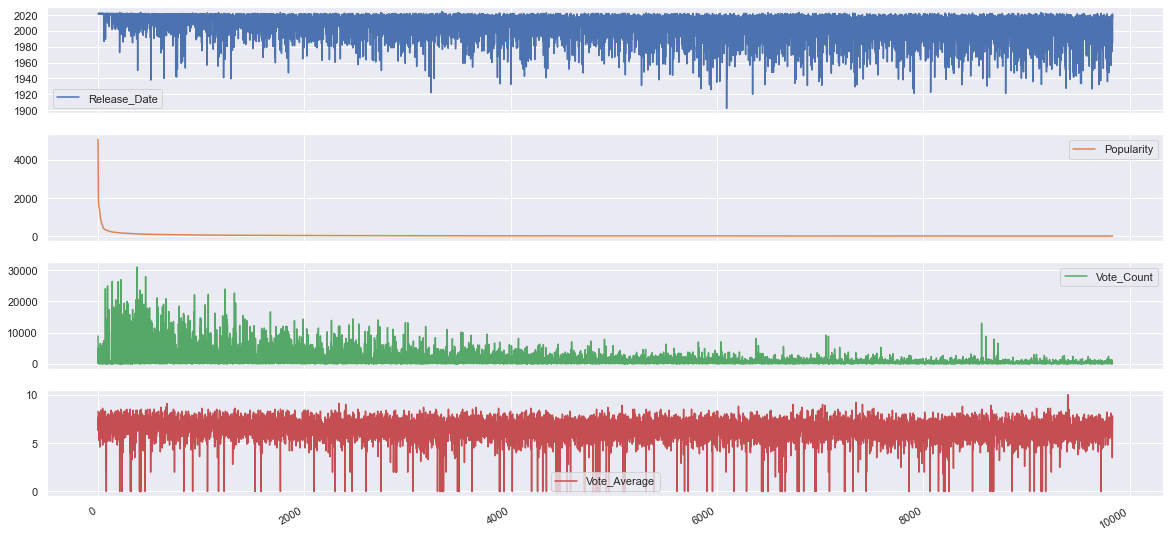

In [19]:
df.plot(subplots=True,figsize=(20,10))
#we have outlier at Popularity,Vote_Count,Vote_Average.... Also we can detect outliers by boxblot

In [20]:
#df['Popularity']=((df['Popularity']-df['Popularity'].mean())/df['Popularity'].std()).round(2)

In [21]:
#df.describe()

In [65]:
df['Title'].value_counts()

Alice in Wonderland     4
Beauty and the Beast    4
Inferno                 3
Black Christmas         3
Godzilla                3
                       ..
Attack on Titan         1
Next Gen                1
The Glimmer Man         1
The Call of Sex         1
Runaway Train           1
Name: Title, Length: 9512, dtype: int64

In [73]:
#dealing with duplicated title
a=df['Title'].value_counts().values
b=a[:]
for i in range(df['Title'].shape[0]):
    idx=Pd.Index(a).get_loc(df[title][i])
    df['Title'][i]=df['Title'][i]+'part'+str((b[idx]-a[idx])+1)
    a[idx]-=1

NameError: name 'Pd' is not defined

# Explor Data
## Questions to answers
#### 1- What is the most popular type of movie?
#### 2-What kind of movies have the highest rating?
#### 3-What is the most watched movie?
#### 4-What is the year that many films have been produced?

In [22]:
df.head(10)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
5,2022-01-07,The Commando,An elite DEA agent returns home after a failed...,1750.484,33,6.6,en,"Action, Crime, Thriller",https://image.tmdb.org/t/p/original/pSh8MyYu5C...
6,2022-01-12,Scream,Twenty-five years after a streak of brutal mur...,1675.161,821,6.8,en,"Horror, Mystery, Thriller",https://image.tmdb.org/t/p/original/kZNHR1upJK...
7,2022-02-10,Kimi,A tech worker with agoraphobia discovers recor...,1601.782,206,6.3,en,Thriller,https://image.tmdb.org/t/p/original/okNgwtxIWz...
8,2022-02-17,Fistful of Vengeance,A revenge mission becomes a fight to save the ...,1594.013,114,5.3,en,"Action, Crime, Fantasy",https://image.tmdb.org/t/p/original/3cccEF9QZg...
9,2021-11-03,Eternals,The Eternals are a team of ancient aliens who ...,1537.406,4726,7.2,en,Science Fiction,https://image.tmdb.org/t/p/original/zByhtBvX99...


# 1-What is the most popular type of movie?

In [23]:
df['Genre'].unique()

[Action, Adventure, Science Fiction, Crime, Mystery, Thriller, Thriller, Animation, Comedy, Family, Fantasy, Action, Adventure, Thriller, War, ..., Fantasy, Music, Crime, Drama, Romance, Thriller, Mystery, Comedy, TV Movie, Romance, Science Fiction, Fantasy, Family, Music, War, Drama, Science Fiction]
Length: 2337
Categories (2337, object): [Action, Adventure, Science Fiction, Crime, Mystery, Thriller, Thriller, Animation, Comedy, Family, Fantasy, ..., Crime, Drama, Romance, Thriller, Mystery, Comedy, TV Movie, Romance, Science Fiction, Fantasy, Family, Music, War, Drama, Science Fiction]

Text(0, 0.5, 'Count')

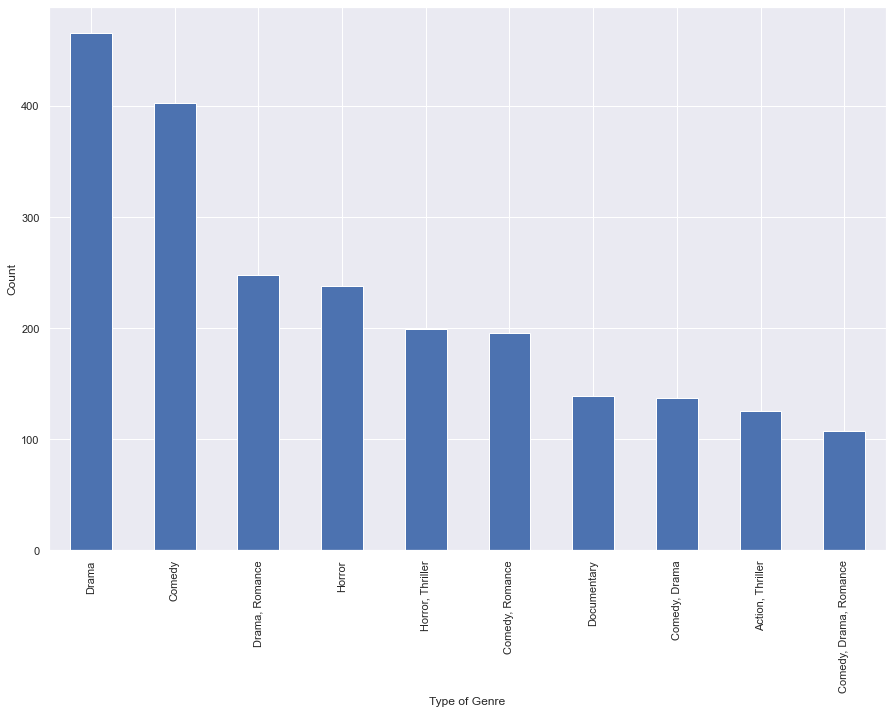

In [24]:
df_gen=df['Genre'].value_counts()
df_gen.head(10).plot(kind='bar',figsize=(15,10))
plt.xlabel('Type of Genre')
plt.ylabel('Count')
#Drama is the most popular type for movies

### Drama is the most popular type for movies

# 2-What kind of movies have the highest rating?

In [25]:
df['Vote_Count'].max()

31077

In [26]:
df[df['Vote_Count']==31077]

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
380,2010-07-15,Inception,"Cobb, a skilled thief who commits corporate es...",127.131,31077,8.4,en,"Action, Science Fiction, Adventure",https://image.tmdb.org/t/p/original/edv5CZvWj0...


In [27]:
df_vot=df.sort_values('Vote_Count',ascending=False)
#Types of moves that have high rate

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

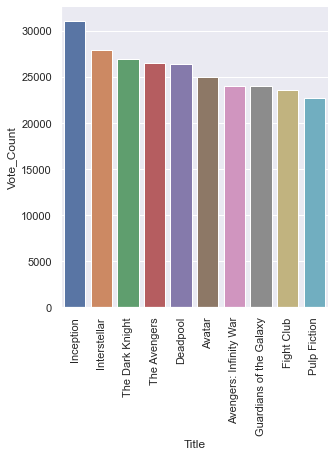

In [28]:
sns.catplot(x='Title',y='Vote_Count',data=df_vot.head(10),kind='bar')
plt.xticks(rotation=90)
#inception is a high rating

### inception is a high rating

# 3-What is the most watched movie?

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

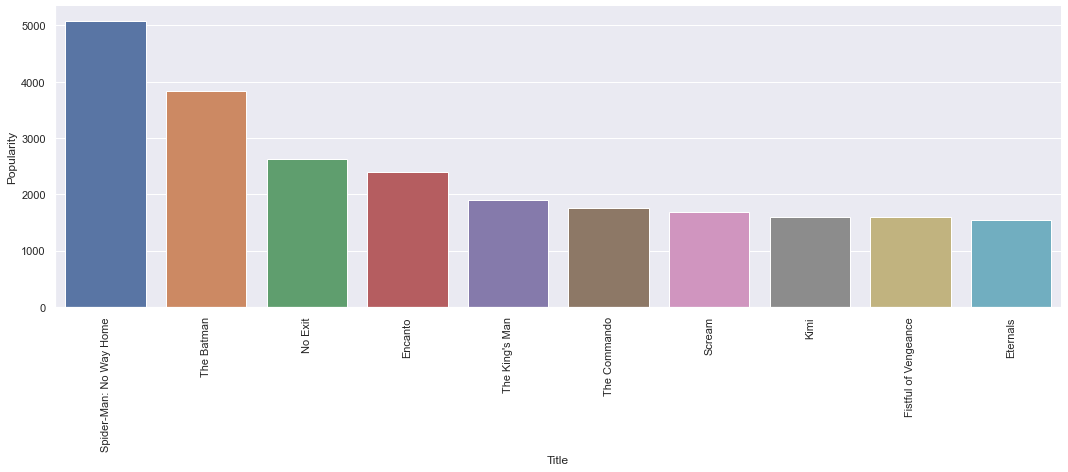

In [29]:
df_pop=df.groupby('Title')['Popularity'].max().reset_index().sort_values(by='Popularity',ascending=False)
sns.catplot(x ="Title", y ="Popularity",data=df_pop.head(10),kind='bar',height=5,aspect=3)
plt.xticks(rotation=90)
#Spider-Man: No Way Home is the most watched movie

### Spider-Man: No Way Home is the most watched movie

# 4-What is the year that many films have been produced?

Text(0, 0.5, 'Count')

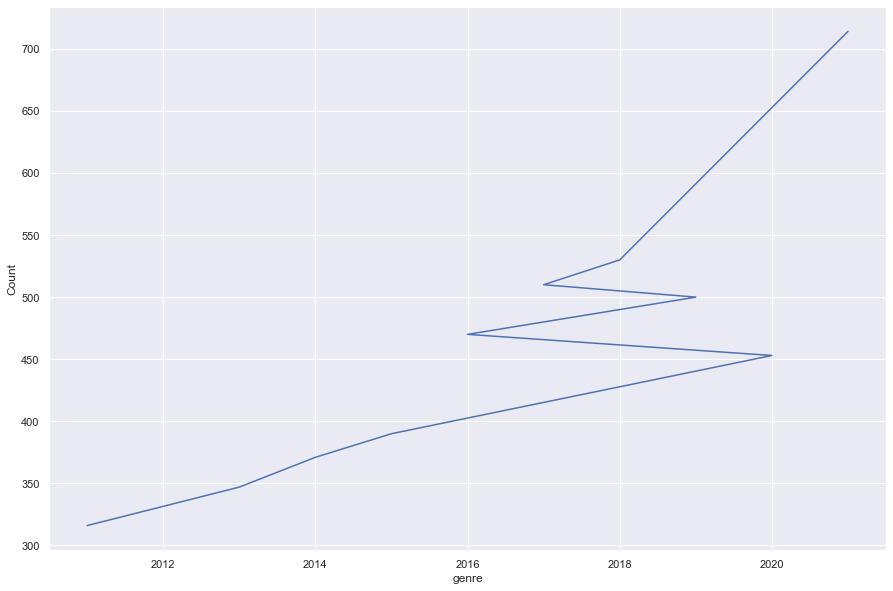

In [30]:
df_years=df['Release_Date'].dt.year.value_counts()[:10]
df_years.plot(kind='line',figsize=(15,10))
plt.xlabel('genre')
plt.ylabel('Count')
#2021  is the year that many films have been produced

### 2021  is the year that many films have been produced

# What is the most 10 popular genre of English films?

Text(0, 0.5, 'Count')

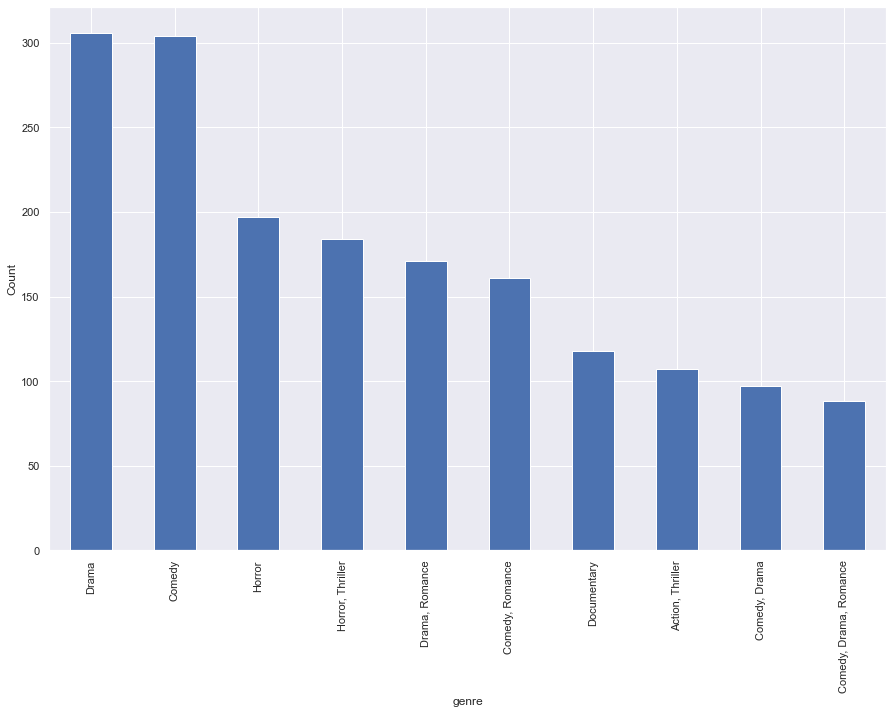

In [31]:
df_english=df[df['Original_Language']=='en']['Genre'].value_counts()[:10]
df_english.plot(kind='bar',figsize=(15,10))
plt.xlabel('genre')
plt.ylabel('Count')
#darama and comody are the most popular genre in english movies

### darama and comody are the most popular genre in english movies

# What is the most 10 popular genre of France films?

In [32]:
df_france=df[df['Original_Language']=='fr']['Genre'].value_counts()[:10]

Text(0, 0.5, 'Count')

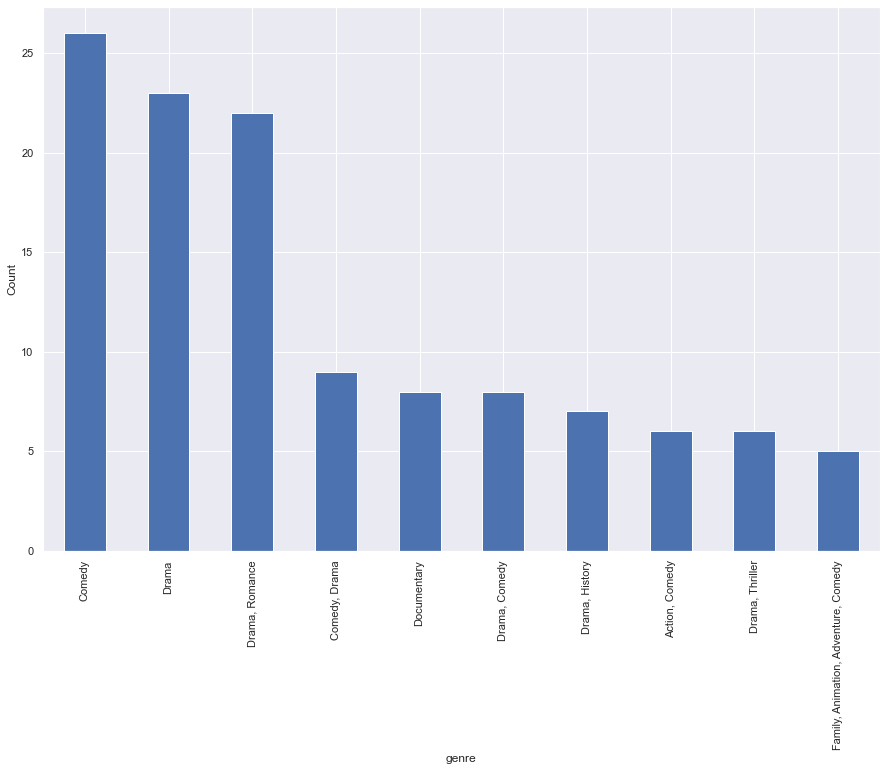

In [33]:
df_france.plot(kind='bar',figsize=(15,10))
plt.xlabel('genre')
plt.ylabel('Count')
#comody is the most popular genre in english movies

### comody is the most popular genre in english movies

# What country releases the most movies?

In [34]:
top_10=df['Original_Language'].value_counts().nlargest(10)

Text(0, 0.5, 'Count')

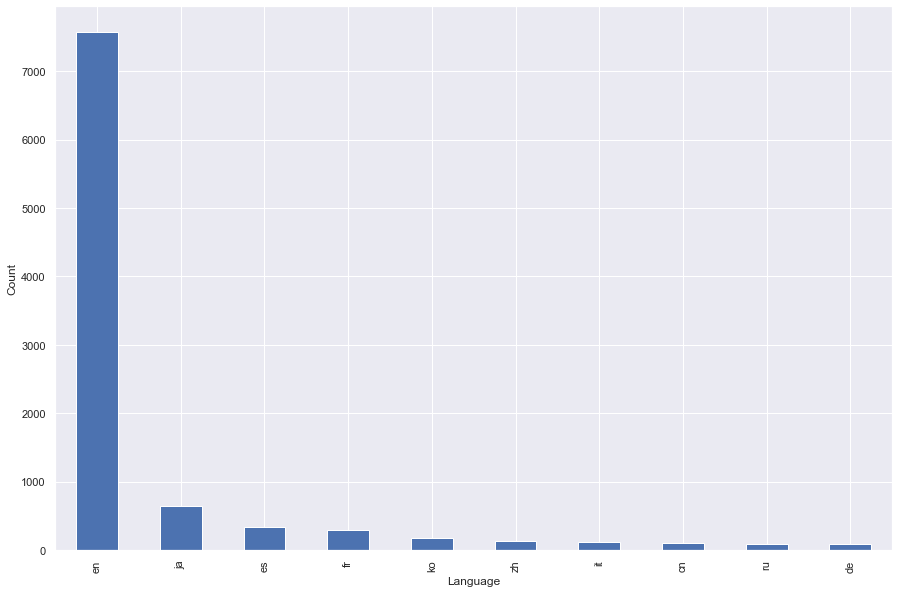

In [35]:
top_10.plot(kind='bar',figsize=(15,10))
plt.xlabel('Language')
plt.ylabel('Count')
#English 'Original_Language' releases the most movies

In [43]:
dff=df.sort_values("Popularity")
top_rated=dff[0:10]
fig =px.sunburst(
    top_rated,
    path=['Title','Original_Language'],
    values='Popularity',
    color='Popularity')
fig.show()

### English 'Original_Language' releases the most movies

# What is the name of the most popular movie for each language?

<ipython-input-36-5cf2700602b1>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_max=df.groupby('Original_Language')['Popularity','Title'].max().reset_index().sort_values(by='Popularity',ascending=False)


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], <a list of 10 Text major ticklabel objects>)

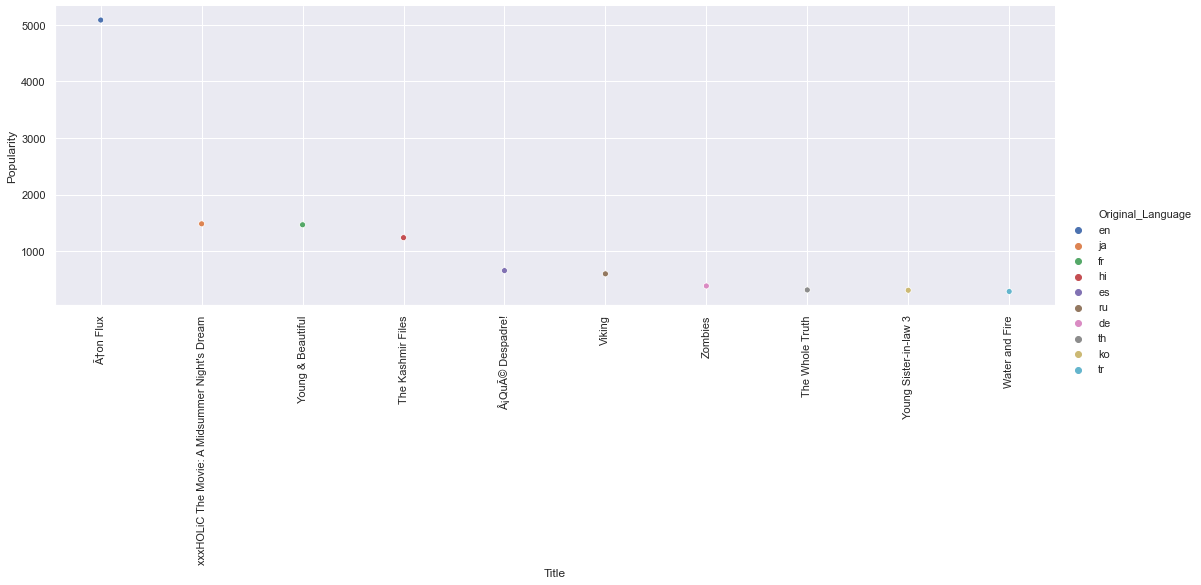

In [36]:
df_max=df.groupby('Original_Language')['Popularity','Title'].max().reset_index().sort_values(by='Popularity',ascending=False)
sns.relplot(x ="Title", y ="Popularity",hue='Original_Language',data=df_max.head(10),kind='scatter',height=5,aspect=3)
plt.xticks(rotation=90)

###  the name of the most popular movie for each language

In [37]:
df['Title'].value_counts()#why first Release was for Beauty and the Beast 1945 and second 1991 ? war ?

Alice in Wonderland     4
Beauty and the Beast    4
Inferno                 3
Black Christmas         3
Godzilla                3
                       ..
Attack on Titan         1
Next Gen                1
The Glimmer Man         1
The Call of Sex         1
Runaway Train           1
Name: Title, Length: 9512, dtype: int64

In [38]:
df

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...
...,...,...,...,...,...,...,...,...,...
9832,1973-10-15,Badlands,A dramatization of the Starkweather-Fugate kil...,13.357,896,7.6,en,"Drama, Crime",https://image.tmdb.org/t/p/original/z81rBzHNgi...
9833,2020-10-01,Violent Delights,A female vampire falls in love with a man she ...,13.356,8,3.5,es,Horror,https://image.tmdb.org/t/p/original/4b6HY7rud6...
9834,2016-05-06,The Offering,When young and successful reporter Jamie finds...,13.355,94,5.0,en,"Mystery, Thriller, Horror",https://image.tmdb.org/t/p/original/h4uMM1wOhz...
9835,2021-03-31,The United States vs. Billie Holiday,Billie Holiday spent much of her career being ...,13.354,152,6.7,en,"Music, Drama, History",https://image.tmdb.org/t/p/original/vEzkxuE2sJ...


Text(0, 0.5, 'Count')

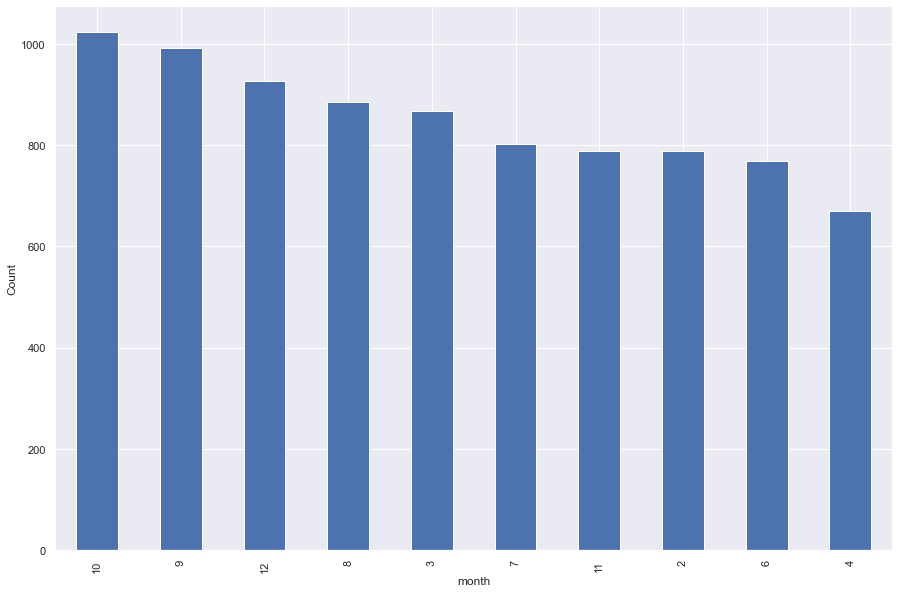

In [39]:
df_month=df['Release_Date'].dt.month.value_counts()[:10]
df_month.plot(kind='bar',figsize=(15,10))
plt.xlabel('month')
plt.ylabel('Count')
#The month of 10 is the most released

### The month of 10 is the most released

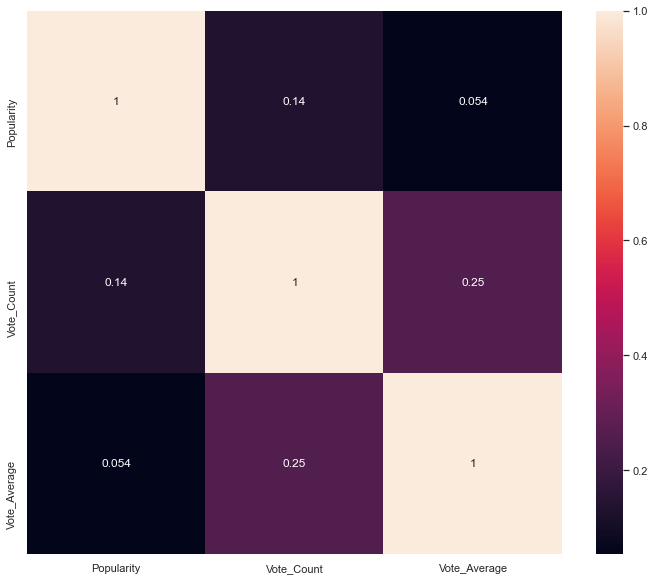

In [44]:
plt.figure(figsize=(12,10))
cor = df.corr()                       #display co-relation between all featuers
sns.heatmap(cor,annot=True)

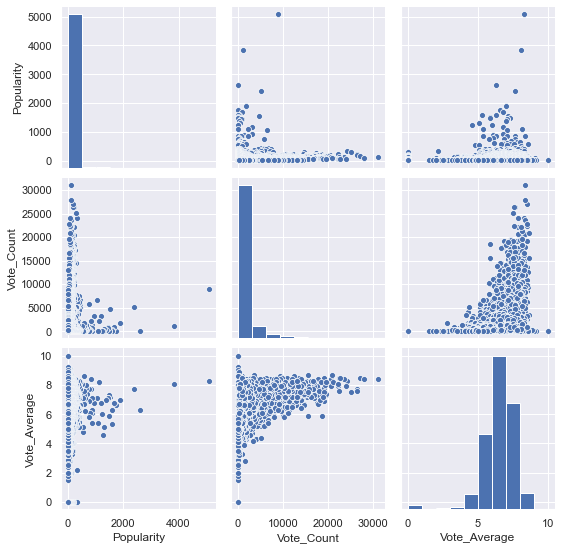

In [41]:
sns.pairplot(df)

# Summary from above two function
## from above function we have little relation between vote_count and vote_avg and popularity with vot_count

In [49]:
df.sort_values('Release_Date').head(10)

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
6094,1902-04-17,A Trip to the Moon,Professor Barbenfouillis and five of his colle...,18.356,1284,8.0,fr,"Adventure, Fantasy, Science Fiction",https://image.tmdb.org/t/p/original/9o0v5LLFk5...
6346,1920-02-27,The Cabinet of Dr. Caligari,"Francis, a young man, recalls in his memory th...",17.858,1075,8.0,de,"Drama, Horror, Thriller, Crime",https://image.tmdb.org/t/p/original/myK9DeIsXW...
7913,1921-01-01,The Phantom Carriage,It's New Year's Eve. Three drunkards evoke a l...,15.371,213,7.9,sv,"Drama, Fantasy, Horror",https://image.tmdb.org/t/p/original/yGNekNFaI4...
8799,1921-01-21,The Kid,A tramp cares for a boy after he's abandoned a...,14.338,1528,8.2,en,"Comedy, Drama",https://image.tmdb.org/t/p/original/drgMcyTsyS...
3229,1922-02-16,Nosferatu,Vampire Count Orlok is interested in a new res...,28.638,1406,7.7,de,"Fantasy, Horror",https://image.tmdb.org/t/p/original/zx24O7VAs6...
8072,1922-09-18,HÃ¤xan,"Grave robbing, torture, possessed nuns, and a ...",15.164,241,7.6,sv,"Documentary, Horror, History",https://image.tmdb.org/t/p/original/As8MXPHo1z...
5944,1925-12-24,Battleship Potemkin,A dramatized account of a great Russian naval ...,18.663,840,7.7,ru,"Drama, History",https://image.tmdb.org/t/p/original/tjnaRiHUsx...
9636,1926-10-13,Faust,God and Satan war over earth; to settle things...,13.514,242,7.9,de,"Drama, Fantasy, Horror",https://image.tmdb.org/t/p/original/wyqcaa9Cbj...
7902,1926-12-25,The General,"During Americaâ€™s Civil War, Union spies stea...",15.388,846,8.1,en,"Action, Adventure, Comedy, Drama, War",https://image.tmdb.org/t/p/original/dd2cviAare...
5845,1927-02-06,Metropolis,In a futuristic city sharply divided between t...,18.847,1999,8.2,de,"Drama, Science Fiction",https://image.tmdb.org/t/p/original/pxbGZewX32...
